In [13]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('heart_disease.csv')

In [5]:
df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,result
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [4]:
df.iloc[:,7:14]

,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,result
0,109,0,2.4,2,3,3,1
1,160,0,1.6,2,0,7,0
2,141,0,0.3,1,0,7,1
3,105,1,0.2,2,1,7,0
4,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...
265,162,0,0.5,1,0,7,0
266,173,0,0.0,1,0,7,0
267,153,0,1.3,2,0,3,0
268,148,0,0.4,2,0,6,0


In [7]:
df.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
result                                  0
dtype: int64

<Axes: xlabel='result', ylabel='count'>

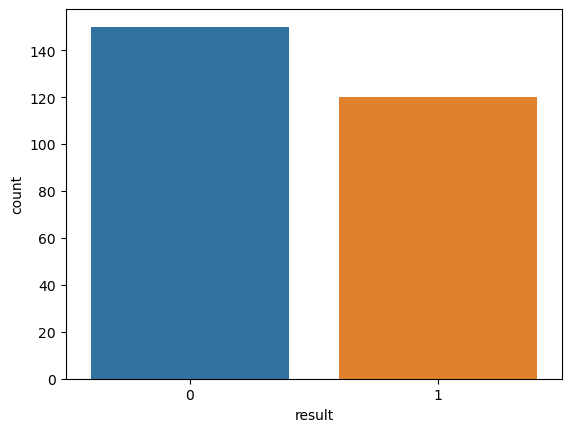

In [8]:
sns.countplot(x=df['result'])

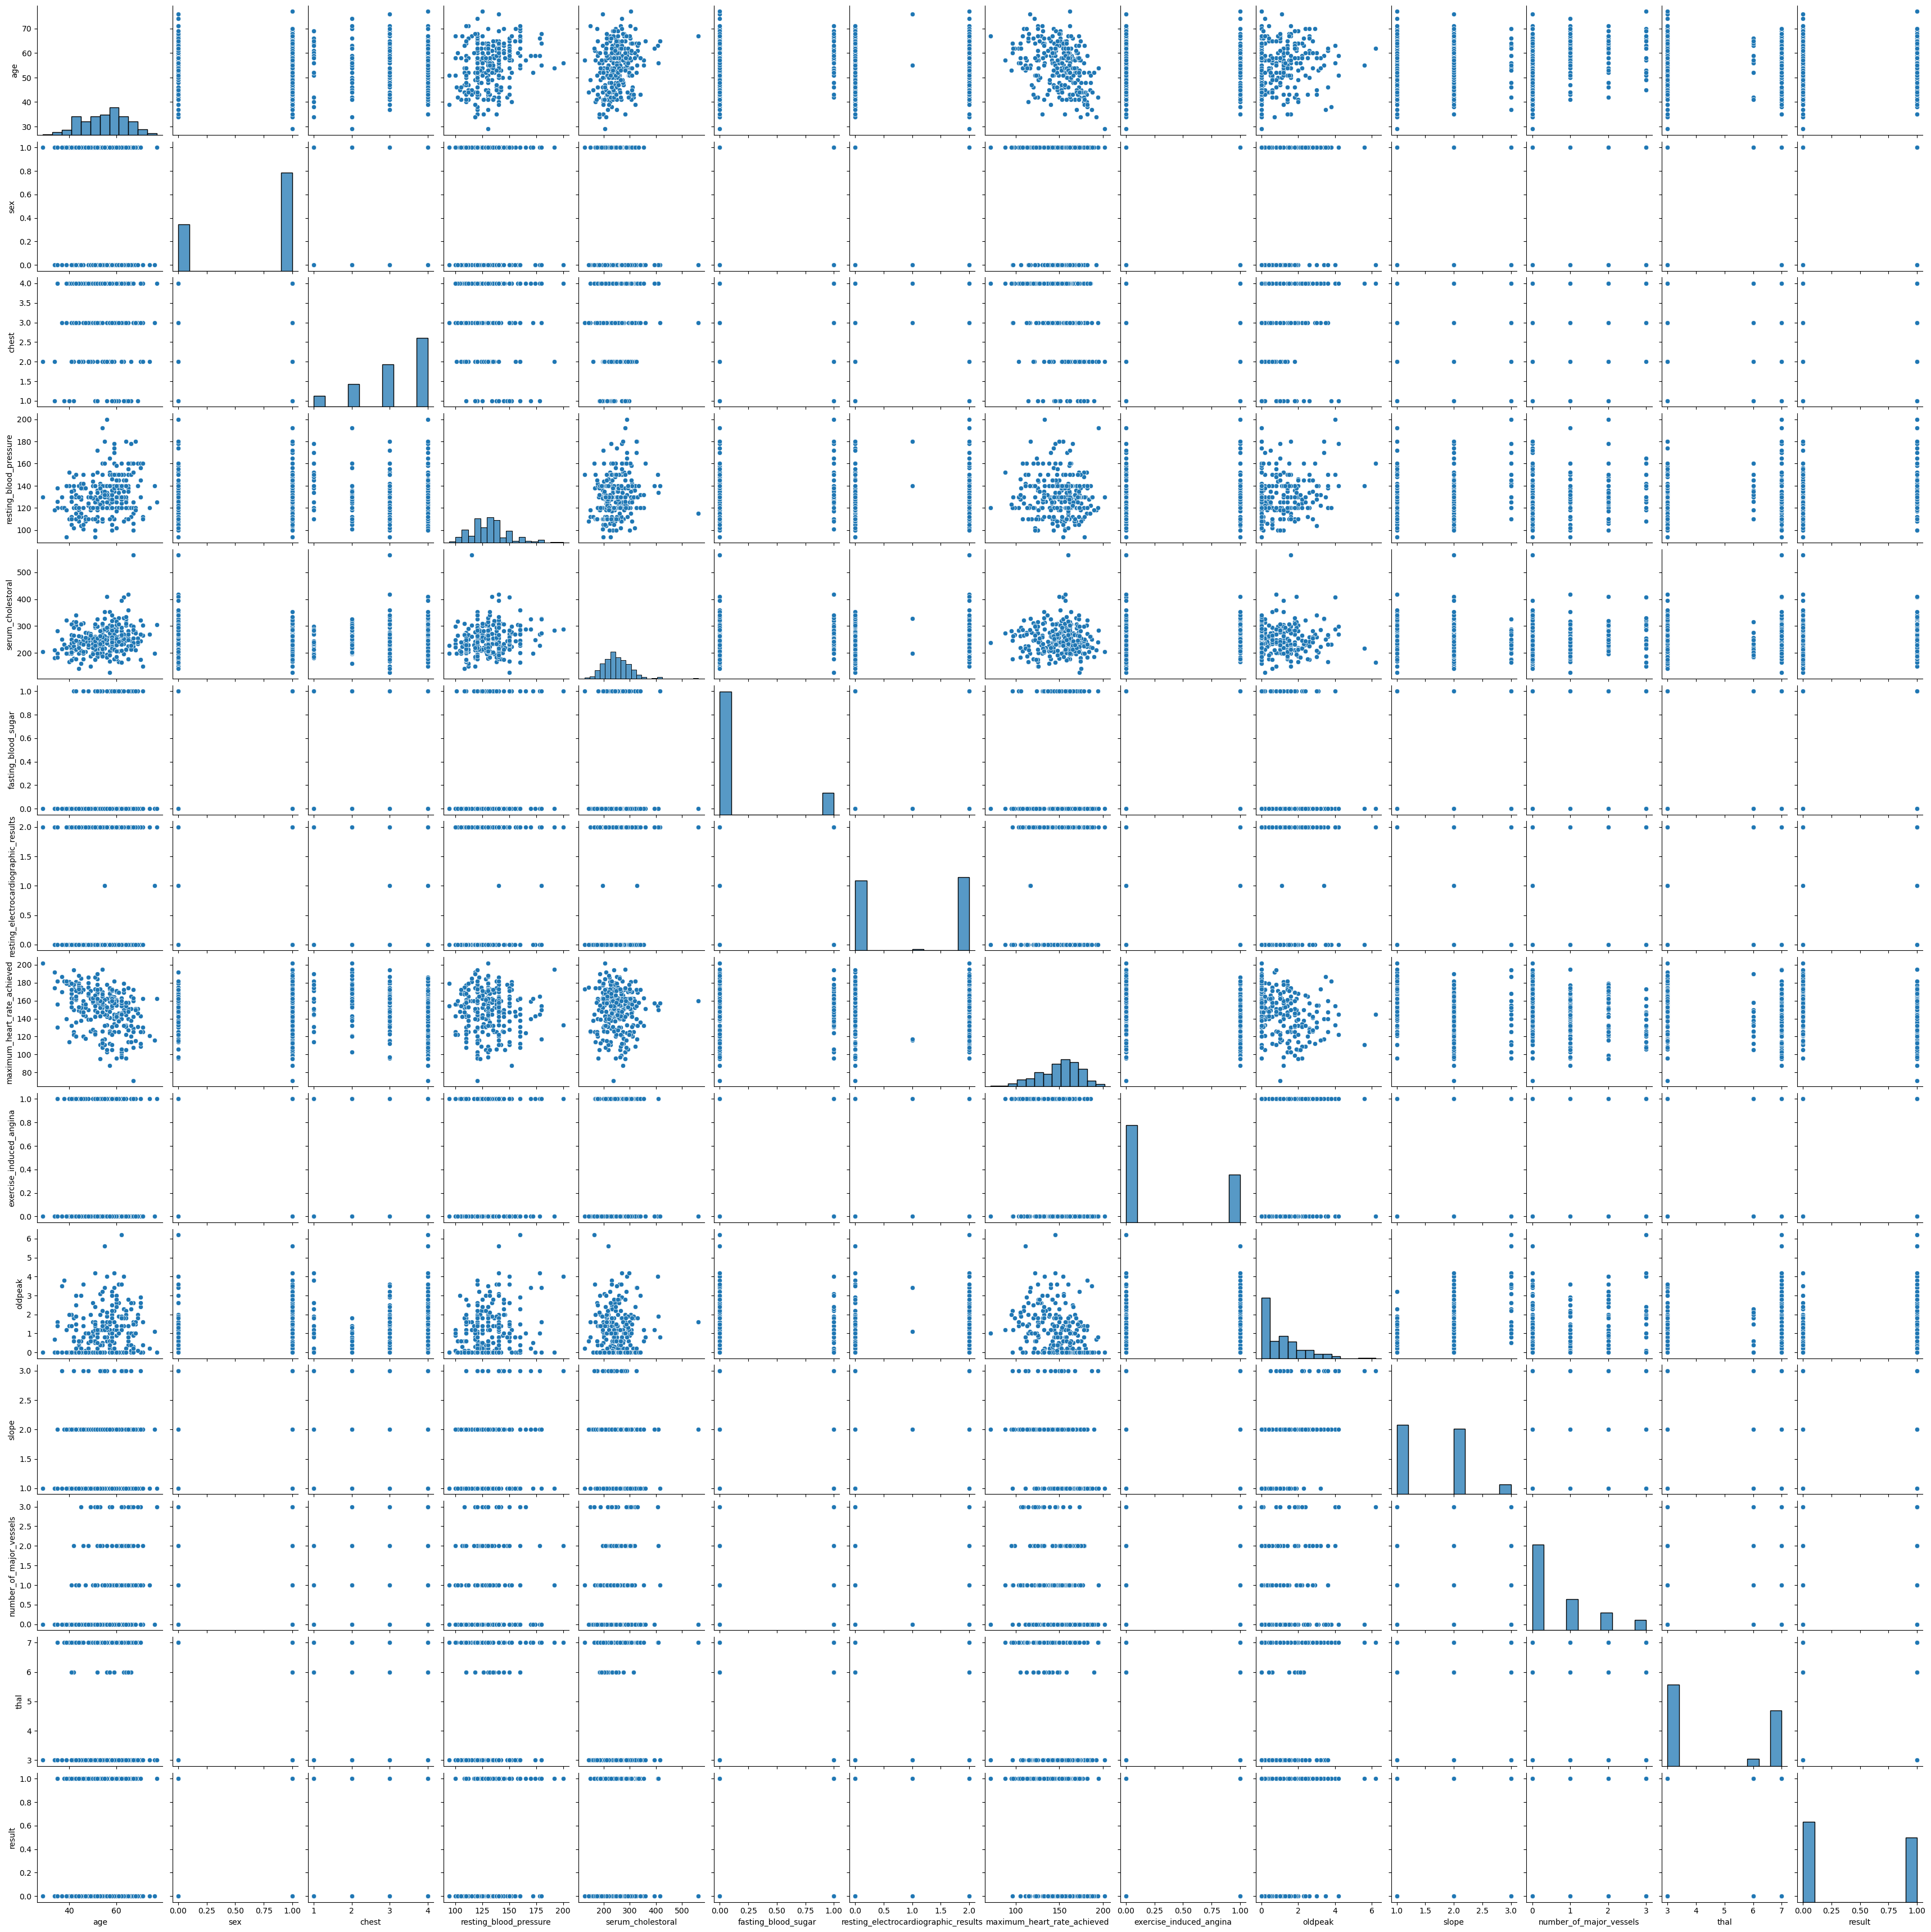

In [15]:
sns.pairplot(data=df)

<Axes: >

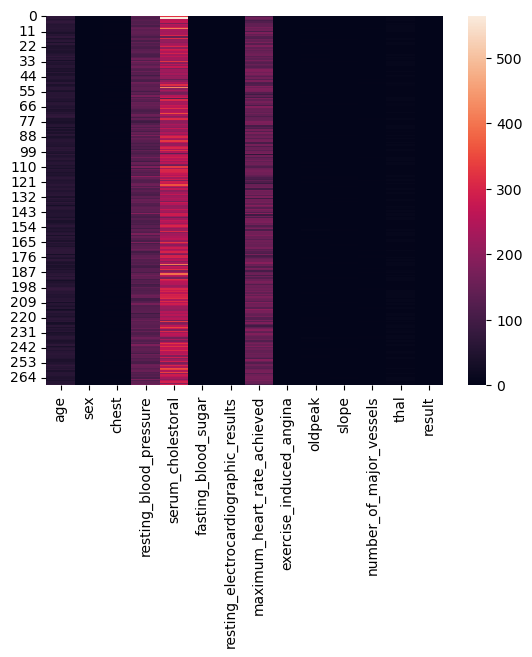

In [17]:
sns.heatmap(df)

<Axes: >

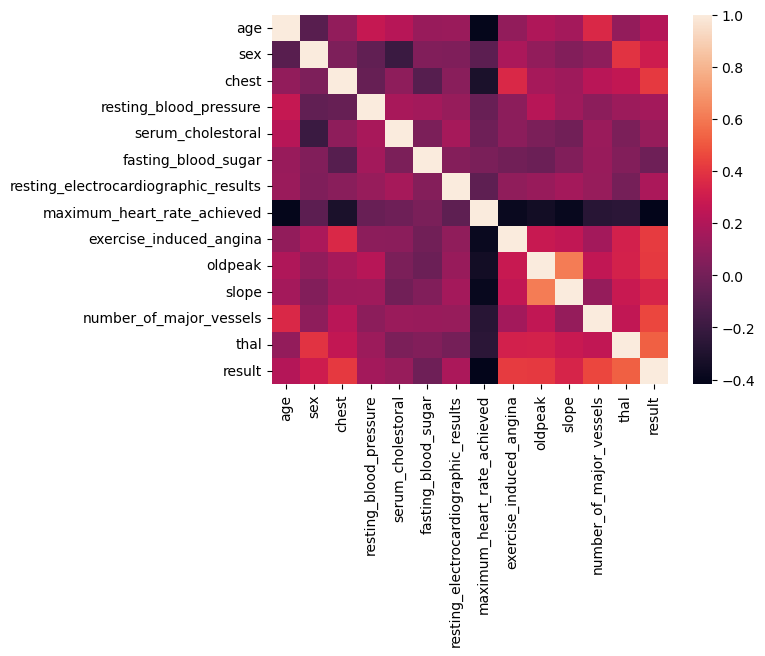

In [18]:
sns.heatmap(df.corr())

In [198]:
df.to_csv('heartdisease.csv')

In [199]:
y=df['result']
X=df.drop('result',axis=1)


In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [225]:
X_train.shape

(216, 13)

In [226]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()

In [227]:
X_train_scaled=stdscaler.fit_transform(X_train)
X_test_scaled=stdscaler.fit_transform(X_test)

In [228]:
from sklearn.naive_bayes import GaussianNB

In [229]:
model=GaussianNB()

In [230]:
model.fit(X_train_scaled,y_train)

GaussianNB()

In [231]:
prediction=model.predict(X_test_scaled)

In [232]:
y_test

206    0
193    1
228    0
88     0
151    0
19     0
252    1
42     0
198    0
236    0
124    0
186    1
51     0
163    1
20     1
155    0
245    1
258    1
38     0
61     1
110    1
104    1
267    0
247    0
235    1
7      1
240    1
5      0
8      1
118    0
64     0
120    1
156    1
17     1
199    1
175    1
196    0
177    1
204    1
95     1
103    1
128    0
222    0
72     0
119    1
76     0
146    1
174    0
9      1
79     0
181    1
253    0
251    0
212    0
Name: result, dtype: int64

In [233]:
model.score(X_test_scaled,y_test)

0.8888888888888888

In [234]:
from sklearn.metrics import f1_score

In [235]:
f1_score(y_test,prediction)

0.8800000000000001

#assuming with this model you want to predict the result of one Gamaliel Natasha,her test result as follows:
age=63years ,sex(0)=female,chest=3,resting_blood_pressure=143,serum_cholestoral=439,fasting_blood_sugar=0,
resting_electrocardiographic_results=1,maximum_heart_rate_achieved=115,exercise_induced_angina=1,oldpeak=2.0
slope=1,number_of_major_vessels	= 3,thal=5

result=?


In [236]:
X_specimen=stdscaler.fit_transform([[63,0,3,143,439,0,1,115,1,2.0,1,3,5]])

In [237]:
model.predict(X_specimen)

array([0])

In [238]:
#This above result shows Gamaliel Natasha is free from heart disease